In [158]:
#Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Our Data

    We are using a data set that has different lifestyle variables and comparing it to each individual's sleep health including, Gender, Age, Occupation, and Daily Steps just to name a few.

    Below is what our data looks like.

# Research Questions

#### Investigate what variables and factors affect Sleep Quality?

#### Which factors most significantly affect Sleep Quality?

#### How do these factors relate to one another?

# Cleaning and Analyzing the Data

In [7]:
#Import data
sleep_health_df = pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv')
sleep_health_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
#Cleaning
sleep_health_df = sleep_health_df.fillna('No Disorder') # fill NAs with 'No Disorder'
sleep_health_df = sleep_health_df.replace('Normal Weight','Normal') # replacing the 'Normal Weight' value with 'Normal'
sleep_health_df = sleep_health_df.replace('Sales Representative','Salesperson')
sleep_health_df.drop('Person ID', axis=1, inplace=True) # dropping the ID column, since I believe there are duplicates in the data
sleep_health_df.drop_duplicates(inplace=True) # dropping the duplicate values
sleep_health_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
358,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,No Disorder
359,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,No Disorder
360,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
364,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [11]:
#getting the datatypes and analyzing our data
sleep_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   132 non-null    object 
 1   Age                      132 non-null    int64  
 2   Occupation               132 non-null    object 
 3   Sleep Duration           132 non-null    float64
 4   Quality of Sleep         132 non-null    int64  
 5   Physical Activity Level  132 non-null    int64  
 6   Stress Level             132 non-null    int64  
 7   BMI Category             132 non-null    object 
 8   Blood Pressure           132 non-null    object 
 9   Heart Rate               132 non-null    int64  
 10  Daily Steps              132 non-null    int64  
 11  Sleep Disorder           132 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 13.4+ KB


# Methodology and Analysis

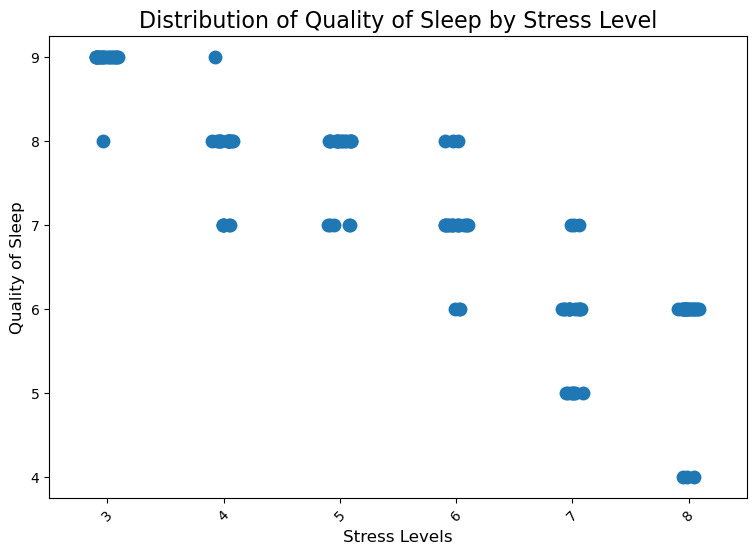

In [187]:
#Seeing a relationship between stress and quality of sleep
plt.figure(figsize=(9, 6))
sns.stripplot(x='Stress Level', 
              y='Quality of Sleep', 
              data=sleep_health_df, 
              size=10)
plt.title('Distribution of Quality of Sleep by Stress Level', fontsize=16)
plt.xlabel('Stress Levels', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.xticks(rotation=45)
plt.show()

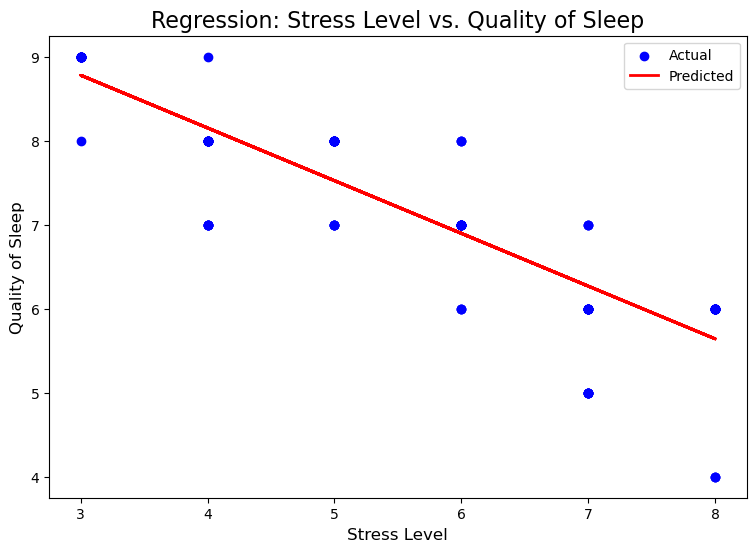

In [16]:
# Feature and target variable
X_stress = sleep_health_df[["Stress Level"]]  # Independent variable
y_quality = sleep_health_df["Quality of Sleep"]  # Dependent variable

# Initialize and fit the Linear Regression model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_stress, y_quality, test_size=0.30, random_state=324)
model.fit(X_train, y_train)

# Predictions
y_hat = model.predict(X_test)

# Plot the regression line
plt.figure(figsize=(9, 6))
plt.scatter(X_stress, y_quality, color="blue", label="Actual")
plt.plot(X_test, y_hat, color="red", label="Predicted", linewidth=2)
plt.title("Regression: Stress Level vs. Quality of Sleep", fontsize=16)
plt.xlabel("Stress Level", fontsize=12)
plt.ylabel("Quality of Sleep", fontsize=12)
plt.legend()
plt.show()

#### We can see that there is a negative linear relationship between Stress Levels and Quality of Sleep. As we are more stressed, we tend to have poorer sleep.

## What variables are related to stress?

Gender
Male      67
Female    65
Name: count, dtype: int64


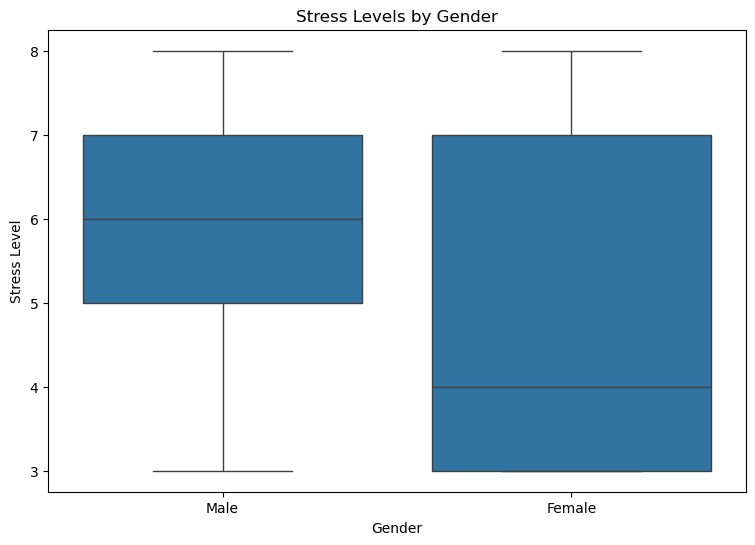

In [192]:
#Stress by Gender
print(sleep_health_df['Gender'].value_counts())
plt.figure(figsize=(9, 6))
sns.boxplot(x="Gender", y="Stress Level", data=sleep_health_df)
plt.title("Stress Levels by Gender")
plt.show()

#### Given this box plot, males and females have high stress, but the median stress for a male is higher than a female, in this dataset. We would use the median since it is less affected by extreme values and provides a better representation of the "typical" stress level within the data, whereas the mean can be significantly pulled towards the outliers. For example, different occupations may be more stressful than others.

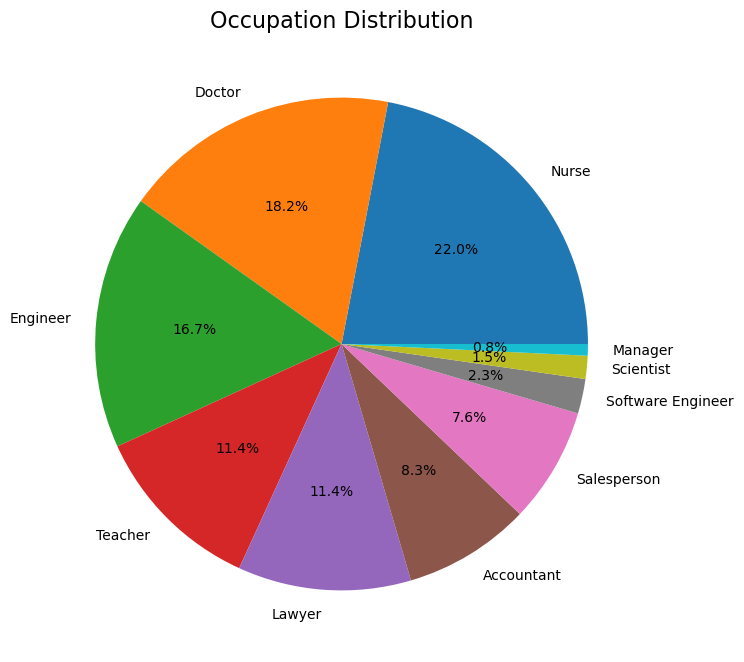

In [195]:
#Seeing how many of each occupation we have in the data

plt.figure(figsize=(8, 8))
occupation = sleep_health_df['Occupation'].value_counts()

plt.pie(occupation, 
        labels=occupation.index, 
        autopct='%1.1f%%')

plt.title('Occupation Distribution', fontsize=16)

plt.show()

#### There is some skewness here since there are more observations for various occupations. The majority of the occupations are doctors, nurses, and engineers.

Occupation
Nurse                29
Doctor               24
Engineer             22
Teacher              15
Lawyer               15
Accountant           11
Salesperson          10
Software Engineer     3
Scientist             2
Manager               1
Name: count, dtype: int64


<Figure size 900x600 with 0 Axes>

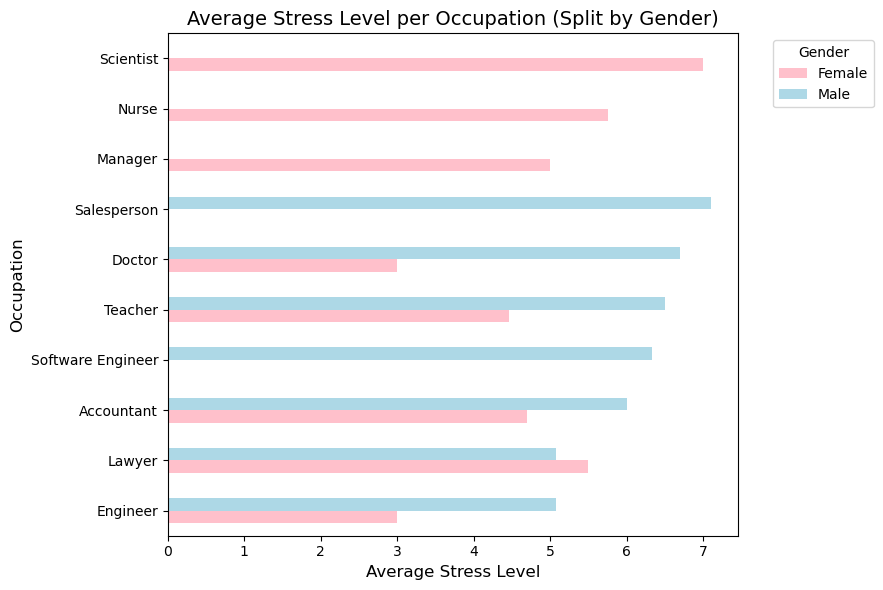

In [32]:
#seeing a relationship between stress and careers
occupation.to_frame(name='Counts') #convert to df

print(occupation)

# Group data by Occupation and Gender, then calculate the mean Stress Level
avg_stress_per_occupation_gender = sleep_health_df.groupby(["Occupation", "Gender"])["Stress Level"].mean().unstack().sort_values(by = 'Male')

# Plotting
plt.figure(figsize=(9, 6))
avg_stress_per_occupation_gender.plot(
    kind="barh",
    figsize=(9, 6),
    stacked=False,
    color=["pink", "lightblue"]
)
plt.title("Average Stress Level per Occupation (Split by Gender)", fontsize=14)
plt.xlabel("Average Stress Level", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Given this bar chart comparing average stress levels per occupation, split by gender, we can see that the average stress levels for females (represented by the pink bars) are less than the average stress levels for males. In particular, Accountants, Engineers, Teachers, and Doctors all present less stress than their male counterparts. The only outlier being lawyers, presenting higher stress for females than males. 

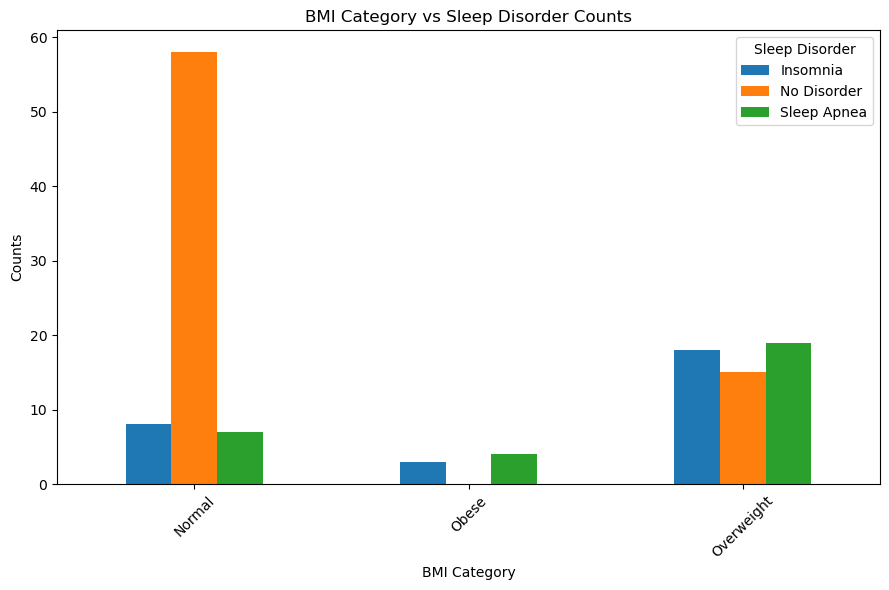

In [40]:
#distribution of BMI and types of sleeping disorders
#can change to gender too to see trends, women have more sleep apnea
# can maybe do a logistic regression on this

BMI_Sleep_Disorder = sleep_health_df[['Sleep Disorder', 'BMI Category']]
# What is the difference between 'normal' and 'normal weight'?

BMI_Sleep_Disorder = BMI_Sleep_Disorder.value_counts()
BMI_Sleep_Disorder_df = BMI_Sleep_Disorder.to_frame(name='Counts')
BMI_Sleep_Disorder_df
pivot_df = BMI_Sleep_Disorder_df.pivot_table(index='BMI Category', columns='Sleep Disorder', values='Counts', fill_value=0)

# Plot the data
pivot_df.plot(kind='bar', figsize=(9, 6))

# Customize the plot
plt.title('BMI Category vs Sleep Disorder Counts')
plt.xlabel('BMI Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.tight_layout()

# Show the plot
plt.show()

#### Given our dataset, we can see that Normal weighted people are less likely to have a Sleep Disorder compared to Overweight people. If there were more data, I believe that the Obese category would have more counts than the Overweight category. Additionally, given a larger dataset, we could analyze the sleep disorders for underweight individuals.

# Our Models

# Decision Tree

In [45]:
#Decision Tree predicting the Quality of Sleep given features

features = ['Gender', 'Sleep Duration','Stress Level','BMI Category']
X = sleep_health_df[features].copy() # X variables

#converting gender to floats
X["is_Male"] = pd.get_dummies(X["Gender"], drop_first=True).astype(float)
X.drop('Gender', axis=1, inplace=True)

# converting BMI to floats
bmi_map = {"Normal": 0.0, "Overweight": 1.0, "Obese": 2.0}
X["BMI"] = X["BMI Category"].map(bmi_map)
X.drop('BMI Category', axis=1, inplace=True)

y=sleep_health_df[['Quality of Sleep']].copy() # y variable, what we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=324)

#if we want to see how large our sets are
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

#defining our classifier
quality_classifier = DecisionTreeClassifier(max_leaf_nodes=6, max_depth = 6, random_state=0)

#training our model on training set
quality_classifier.fit(X_train, y_train)

#Predicting
predictions = quality_classifier.predict(X_test)

#accuracy of our decision tree model. Using Gender, Sleep Duration, BMI, and Stress Levels
print('Accuracy of our decision tree model: ', accuracy_score(y_true = y_test, y_pred = predictions))

Accuracy of our decision tree model:  0.8490566037735849


### Cross-Validation

In [165]:
# Cross validation
quality_classifier_dt = DecisionTreeClassifier(random_state=123)

params_dt = {
'criterion': ['gini', 'entropy'],
'max_depth': [3,4,5, 6],
'max_leaf_nodes':[5,10,15,20],
'max_features': [0.2, 0.4,0.6, 0.8]
}

# Instantiate a 2-fold CV random search object 'quality_classifier_dt_rscv '
quality_classifier_dt_rscv = RandomizedSearchCV(estimator=quality_classifier_dt,
                      param_distributions=params_dt,
                      scoring='accuracy',
                       cv=2)
# Fit 'quality_classifier_dt_rscv' to the training data
quality_classifier_dt_rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=123),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [0.2, 0.4, 0.6, 0.8],
                                        'max_leaf_nodes': [5, 10, 15, 20]},
                   scoring='accuracy')

In [171]:
#Best params for Decision Tree
best_hyperparams = quality_classifier_dt_rscv.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_leaf_nodes': 20, 'max_features': 0.8, 'max_depth': 5, 'criterion': 'gini'}


In [173]:
#Best training accuracy
#Extract CV score of the best model from 'quality_classifier_dt_rscv'
best_CV_score = quality_classifier_dt_rscv.best_score_
print('Best training accuracy: ', best_CV_score)

Best training accuracy:  0.8858974358974359


In [182]:
 # Extract best model from 'quality_classifier_dt_rscv'
best_model = quality_classifier_dt_rscv.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))


Test set accuracy of best model: 0.925


In [184]:
#the Decision tree report
report = classification_report(y_true=y_test, y_pred = best_model.predict(X_test), zero_division = 0)
print(report)

              precision    recall  f1-score   support

           4       0.50      1.00      0.67         1
           5       1.00      0.75      0.86         4
           6       0.91      0.83      0.87        12
           7       0.83      1.00      0.91        10
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00        12

    accuracy                           0.92        53
   macro avg       0.87      0.92      0.88        53
weighted avg       0.94      0.92      0.93        53



## Important Features of our Decision Tree Model

In [179]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Convert to a pandas DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,           # Assuming X is your feature DataFrame
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

          Feature  Importance
0  Sleep Duration    0.622895
1    Stress Level    0.187318
3             BMI    0.126940
2         is_Male    0.062847


#### With this info, we can see that the Sleep Duration is the most important feature for having high quality sleep. It is interesting that BMI doesn't play a factor in quality of sleep, but it does in sleeping disorders. 

# K-Nearest Neighbors (KNN)

In [117]:
features = ['Gender', 'Sleep Duration','Stress Level','BMI Category']
X = sleep_health_df[features].copy() # X variables

#converting gender to floats
X["is_Male"] = pd.get_dummies(X["Gender"], drop_first=True).astype(float)
X.drop('Gender', axis=1, inplace=True)

# converting BMI to floats
bmi_map = {"Normal": 0.0, "Overweight": 1.0, "Obese": 2.0}
X["BMI"] = X["BMI Category"].map(bmi_map)
X.drop('BMI Category', axis=1, inplace=True)

y=sleep_health_df['Quality of Sleep'].values # y variable, what we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=324)

In [119]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79, 4)
(79,)
(53, 4)
(53,)


In [121]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
k_range = np.arange(1, 25,2)
param_grid = {'n_neighbors':k_range}
#or:
#param_grid = dict(n_neighbors = k_range)

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=2)
 
#fit model to data
knn_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])})

In [145]:
#check top performing n_neighbors value
best_K_Value = knn_gscv.best_params_
print('Best K value: ', best_K_Value)

Best K value:  {'n_neighbors': 1}


In [147]:
# Extract best CV score from knn_gscv. This is the training accuracy
print('Best training accuracy: ', knn_gscv.best_score_)

Best training accuracy:  0.8737179487179487


In [149]:
# Extract best model
best_model = knn_gscv.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test_scaled,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.906


In [151]:
report = classification_report(y_test, best_model.predict(X_test_scaled))
print(report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       1.00      0.75      0.86         4
           6       0.83      0.83      0.83        12
           7       0.91      1.00      0.95        10
           8       0.93      0.93      0.93        14
           9       1.00      1.00      1.00        12

    accuracy                           0.91        53
   macro avg       0.78      0.75      0.76        53
weighted avg       0.91      0.91      0.90        53



# KNN Feature Importance

In [205]:
from sklearn.inspection import permutation_importance

# Perform permutation importance on the fitted KNN model
perm_importance = permutation_importance(knn_gscv.best_estimator_, X_train_scaled, y_train, scoring='accuracy')

# Create a DataFrame to display results
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with actual feature names
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display the results
print(feature_importance_df)

          Feature  Importance
0  Sleep Duration    0.425316
1    Stress Level    0.364557
3             BMI    0.258228
2         is_Male    0.250633


#### From our KNN Classification data we found that Sleep Duration is the most important factor when regressing against sleep health. The additional factors such as Stress Level, BMI, and gender also significantly affect sleep health. 

# Conclusion

    To conclude, there are a lot of variables within this dataset, but one stands out the most in deciding how well the quality of your sleep will be. And that variable is sleep duration. Making sure that you get an ample amount of sleep regularly will only benefit you in the long term. 
    
    Stress levels additionally play a factor in your quality of sleep. There is a negative correlation between the two, so when there are times when you can control your stress, do so. But there are times when you can't, for example, your gender. In this dataset, the range of stress between males and females tends to be higher in males. 
    
    Moreover, different occupations tend to have different levels of stress, which may lead to poor sleep quality. The visualization gravitates toward salespeople having higher stress. This may be because their earnings are not set in salary but based on how much they sell per month. 
   
    Finally, BMI plays a factor in sleeping disorders. When you are above the recommended BMI, you gravitate towards having sleep apnea or insomnia.
